In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [6]:
titanic.sort_values(by="Age").tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
titanic.sort_values(by="Age").dropna(subset=["Age"]).tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S


In [19]:
titanic.groupby(["Pclass","Sex"])["Age"].agg(['max'])

max
Pclass Sex         
1      female  63.0
       male    80.0
2      female  57.0
       male    70.0
3      female  63.0
       male    74.0

In [20]:
titanic.groupby(["Pclass","Sex"])["Age"].agg(['max']).unstack()

max      
Sex    female  male
Pclass             
1        63.0  80.0
2        57.0  70.0
3        63.0  74.0

In [21]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


In [22]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=[True,False]).head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [29]:
air_quality = pd.read_csv(
    "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_long.csv", 
    index_col="date.utc", 
    parse_dates=True
)


air_quality.head()


no2 = air_quality[air_quality["parameter"] == "no2"]
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


In [34]:
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [35]:
no2.location.value_counts()

FR04014               1676
London Westminster    1608
BETR801                163
Name: location, dtype: int64

In [37]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


In [39]:
no2_subset.pivot(columns="location", values="country")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,BE,FR,NaN
2019-04-09 02:00:00+00:00,BE,FR,GB
2019-04-09 03:00:00+00:00,NaN,NaN,GB


In [40]:
no2_subset.pivot(columns="location", values=["country",'value'])

country                              value          \
location                  BETR801 FR04014 London Westminster BETR801 FR04014   
date.utc                                                                       
2019-04-09 01:00:00+00:00      BE      FR                NaN    22.5    24.4   
2019-04-09 02:00:00+00:00      BE      FR                 GB    53.5    27.4   
2019-04-09 03:00:00+00:00     NaN     NaN                 GB     NaN     NaN   

                                              
location                  London Westminster  
date.utc                                      
2019-04-09 01:00:00+00:00                NaN  
2019-04-09 02:00:00+00:00               67.0  
2019-04-09 03:00:00+00:00               67.0

In [38]:
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [42]:
no2_subset.pivot(columns=["city"],values = ["value",'unit'])

value                   unit              
city                      Antwerpen London Paris Antwerpen London  Paris
date.utc                                                                
2019-04-09 01:00:00+00:00      22.5    NaN  24.4     µg/m³    NaN  µg/m³
2019-04-09 02:00:00+00:00      53.5   67.0  27.4     µg/m³  µg/m³  µg/m³
2019-04-09 03:00:00+00:00       NaN   67.0   NaN       NaN  µg/m³    NaN

<AxesSubplot:xlabel='date.utc'>

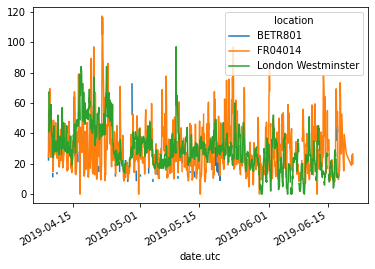

In [43]:
no2.pivot(columns="location", values="value").plot()


In [44]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In [45]:
air_quality.location.value_counts()

London Westminster    3256
FR04014               1676
BETR801                340
Name: location, dtype: int64

In [46]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc=["mean",'max']
)

mean               max      
parameter                 no2       pm25    no2  pm25
location                                             
BETR801             26.950920  23.169492   74.5  99.0
FR04014             29.374284        NaN  117.2   NaN
London Westminster  29.740050  13.443568   97.0  55.0

In [49]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)


parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [50]:
air_quality.groupby('location')['value'].agg(['mean'])

,mean
location,
BETR801,24.982353
FR04014,29.374284
London Westminster,21.491708


In [51]:
air_quality.groupby(["parameter", "location"]).mean()


value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568

In [52]:
air_quality.groupby(["parameter", "location"]).mean().unstack()

value                              
location     BETR801    FR04014 London Westminster
parameter                                         
no2        26.950920  29.374284          29.740050
pm25       23.169492        NaN          13.443568

In [54]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0
...,...,...,...,...
1700,2019-06-20 20:00:00+00:00,NaN,21.4,NaN
1701,2019-06-20 21:00:00+00:00,NaN,24.9,NaN
1702,2019-06-20 22:00:00+00:00,NaN,26.5,NaN
1703,2019-06-20 23:00:00+00:00,NaN,21.8,NaN


In [59]:
titanic[titanic["Name"].str.contains("Countess")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


In [61]:
titanic[titanic["Name"].str.lower().str.contains("countess")]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


In [64]:
print(titanic["Name"].str.len().idxmax())
print(titanic["Name"].str.len().max())

307
82


In [ ]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]


In [68]:
titanic.loc[titanic["Name"].str.len() < 15, "Name"]


74      Bing, Mr. Lee
169     Ling, Mr. Lee
210    Ali, Mr. Ahmed
509    Lang, Mr. Fang
692      Lam, Mr. Ali
826      Lam, Mr. Len
832    Saad, Mr. Amin
Name: Name, dtype: object

In [72]:
air_quality_no2 = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2_long.csv",
                             parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location",
                                   "parameter", "value"]]

air_quality_no2

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4
...,...,...,...,...
2063,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0
2064,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0
2065,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0
2066,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0


In [74]:
air_quality_pm25 = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_pm25_long.csv",
                               parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location",
                                     "parameter", "value"]]

print(len(air_quality_pm25))
air_quality_pm25.head()

1110


,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


<img src="https://www.w3schools.com/sql/img_innerjoin.gif">

In [75]:
air_quality = pd.concat([air_quality_no2,air_quality_pm25])
print(len(air_quality))
air_quality.head()

3178


,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [76]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])

air_quality_.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

In [77]:
stations_coord = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_stations.csv")
print(len(stations_coord))
stations_coord.head()

66


,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [81]:
print(len(stations_coord.location.value_counts()))
stations_coord.location.value_counts()

58


FR04118                              2
FR04071                              2
FR04031                              2
FR04014                              2
FR04135                              2
FR04141                              2
FR04143                              2
FR04329                              2
FR04131                              1
FR04179                              1
Camden Kerbside                      1
Ealing Horn Lane                     1
Haringey Roadside                    1
London Bexley                        1
London Bloomsbury                    1
BELAL01                              1
London Haringey Priory Park South    1
London Harlington                    1
London Harrow Stanmore               1
London Hillingdon                    1
London Marylebone Road               1
London N. Kensington                 1
London Teddington                    1
London Teddington Bushy Park         1
London Westminster                   1
Southend-on-Sea          

In [78]:
air_quality.head()


,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [82]:
air_quality.location.value_counts()

London Westminster    1978
FR04014               1004
BETR801                196
Name: location, dtype: int64

In [84]:
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")
air_quality

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,48.83724,2.39390
1,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,48.83722,2.39390
2,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,48.83724,2.39390
3,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,48.83722,2.39390
4,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,48.83724,2.39390
...,...,...,...,...,...,...
4177,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,51.49467,-0.13193
4178,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193
4179,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193
4180,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193


In [85]:
air_quality

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,48.83724,2.39390
1,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,48.83722,2.39390
2,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,48.83724,2.39390
3,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,48.83722,2.39390
4,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,48.83724,2.39390
...,...,...,...,...,...,...
4177,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,51.49467,-0.13193
4178,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193
4179,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193
4180,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193


In [86]:
air_quality_parameters = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_parameters.csv")

air_quality_parameters.head()


,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [88]:
air_quality = pd.merge(air_quality, air_quality_parameters,
                       how='left', left_on='parameter', right_on='id')

air_quality

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude,id,description,name
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
1,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
2,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
3,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
4,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
...,...,...,...,...,...,...,...,...,...
4177,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,51.49467,-0.13193,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4178,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4179,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4180,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,51.49467,-0.13193,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
